In [ ]:
import pandas as pd
import altair as alt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

## Reading in the data:

In [ ]:
nw_plants = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/Data Stuff/nw_plants.csv')

In [ ]:
nw_plants.head()

,Unnamed: 0,Unnamed: 0.1,index,id,common_name,slug,scientific_name,main_species_id,image_url,year,bibliography,author,family_common_name,genus_id,observations,vegetable,species,subspecies,varieties,hybrids,forms,subvarieties,sources,links.self,links.species,links.genus,main_species.id,main_species.common_name,main_species.slug,main_species.scientific_name,main_species.year,main_species.bibliography,main_species.author,main_species.status,main_species.rank,main_species.family_common_name,main_species.genus_id,main_species.observations,main_species.vegetable,main_species.image_url,...,main_species.growth.light,main_species.growth.atmospheric_humidity,main_species.growth.growth_months,main_species.growth.bloom_months,main_species.growth.fruit_months,main_species.growth.minimum_precipitation.mm,main_species.growth.maximum_precipitation.mm,main_species.growth.minimum_root_depth.cm,main_species.growth.minimum_temperature.deg_f,main_species.growth.minimum_temperature.deg_c,main_species.growth.maximum_temperature.deg_f,main_species.growth.maximum_temperature.deg_c,main_species.growth.soil_nutriments,main_species.growth.soil_salinity,main_species.growth.soil_texture,main_species.growth.soil_humidity,main_species.links.self,main_species.links.plant,main_species.links.genus,genus.id,genus.name,genus.slug,genus.links.self,genus.links.plants,genus.links.species,genus.links.family,family.id,family.name,family.common_name,family.slug,family.links.self,family.links.division_order,family.links.genus,main_species.distribution.doubtful,main_species.distributions.doubtful,main_species.distribution.absent,main_species.distributions.absent,main_species.distribution.extinct,main_species.distributions.extinct,main_species
0,0,0,0.0,184867,stinging nettle,urtica-dioica,Urtica dioica,190500.0,https://bs.plantnet.org/image/o/85256a1c2c098e...,1753.0,Sp. Pl.: 984 (1753),L.,Nettle family,1028.0,"Europe to Siberia and W. China, NW. Africa",False,"[{'id': 190500, 'common_name': 'Stinging nettl...","[{'id': 1143593, 'common_name': 'Stinging nett...","[{'id': 190521, 'common_name': 'Stinging nettl...",[],[],[],"[{'last_update': '2020-06-21T20:55:42.484Z', '...",/api/v1/plants/urtica-dioica,/api/v1/plants/urtica-dioica/species,/api/v1/genus/urtica,190500.0,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028.0,"Europe to Siberia and W. China, NW. Africa",False,https://bs.plantnet.org/image/o/85256a1c2c098e...,...,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,3.0,NaN,/api/v1/species/urtica-dioica,/api/v1/plants/urtica-dioica,/api/v1/genus/urtica,1028,Urtica,urtica,/api/v1/genus/urtica,/api/v1/genus/urtica/plants,/api/v1/genus/urtica/species,/api/v1/families/urticaceae,193,Urticaceae,Nettle family,urticaceae,/api/v1/families/urticaceae,/api/v1/division_orders/urticales,/api/v1/families/urticaceae/genus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.0,121324,orchardgrass,dactylis-glomerata,Dactylis glomerata,126957.0,https://bs.plantnet.org/image/o/428f40dadfa028...,1753.0,Sp. Pl.: 71 (1753),L.,Grass family,2284.0,"Macaronesia, Medit. to Temp. Eurasia",False,"[{'id': 126957, 'common_name': 'Orchardgrass',...","[{'id': 973756, 'common_name': 'Orchardgrass',...",[],[],[],[],"[{'last_update': '2020-06-21T20:54:52.110Z', '...",/api/v1/plants/dactylis-glomerata,/api/v1/plants/dactylis-glomerata/species,/api/v1/genus/dactylis,126957.0,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284.0,"Macaronesia, Medit. to Temp. Eurasia",False,https://bs.plantnet.org/image/o/428f40dadfa028...,...,7.0,5.0,NaN,NaN,NaN,660.0,1524.0,30.0,-22.0,-30.0,NaN,NaN,7.0,0.0,2.0,NaN,/api/v1/species/dactylis-glomerata,/api/v1/plants/dactylis-glomerata,/api/v1/genus/dactylis,2284,Dactylis,dactylis,/api/v1/genus/dactylis,/api/v1/genus/dactylis/plants,/api/v1/genus/dactylis/species,/api/v1/families/poaceae,21,Poaceae,Grass family,poaceae,/api/v1/families/poaceae,/api/v1/division_or

In [ ]:
nw_plants.describe()

,Unnamed: 0,Unnamed: 0.1,index,id,main_species_id,year,genus_id,main_species.id,main_species.year,main_species.genus_id,main_species.fruit_or_seed.shape,main_species.specifications.average_height.cm,main_species.specifications.maximum_height.cm,main_species.growth.days_to_harvest,main_species.growth.row_spacing.cm,main_species.growth.spread.cm,main_species.growth.ph_maximum,main_species.growth.ph_minimum,main_species.growth.light,main_species.growth.atmospheric_humidity,main_species.growth.growth_months,main_species.growth.fruit_months,main_species.growth.minimum_precipitation.mm,main_species.growth.maximum_precipitation.mm,main_species.growth.minimum_root_depth.cm,main_species.growth.minimum_temperature.deg_f,main_species.growth.minimum_temperature.deg_c,main_species.growth.maximum_temperature.deg_f,main_species.growth.maximum_temperature.deg_c,main_species.growth.soil_nutriments,main_species.growth.soil_salinity,main_species.growth.soil_texture,main_species.growth.soil_humidity,genus.id,family.id,main_species
count,5373.000000,5373.000000,1452.0,5373.000000,5.369000e+03,5229.000000,5280.000000,5.280000e+03,5229.000000,5280.000000,0.0,980.000000,972.000000,2.000000,12.000000,10.000000,1532.000000,1532.000000,834.000000,829.000000,0.0,0.0,902.000000,902.000000,912.000000,917.000000,917.000000,3.000000,3.000000,832.000000,833.000000,833.000000,2.000000,5373.000000,5373.000000,0.0
mean,2686.000000,196.059185,0.0,173328.334822,3.006066e+05,1875.441193,2888.054924,2.931099e+05,1875.441193,2888.054924,NaN,332.925510,359.724280,57.500000,22.166667,53.200000,7.399347,5.937990,7.330935,5.841978,NaN,NaN,435.721729,1240.761641,31.745614,-21.087241,-29.486369,89.000000,31.666667,5.292067,0.354142,2.927971,2.500000,2887.844593,107.465476,NaN
std,1551.195829,388.984440,0.0,100364.513253,3.442175e+05,73.989449,2657.404981,3.358916e+05,73.989449,2657.404981,NaN,853.448157,979.213207,24.748737,21.251025,28.502631,0.849297,0.949017,1.237985,1.903562,NaN,NaN,242.822341,726.700780,18.892700,21.600659,12.037019,5.196152,2.886751,1.905097,1.324024,1.289603,0.707107,2656.346941,163.047095,NaN
min,0.000000,0.000000,0.0,95493.000000,1.011260e+05,1753.000000,3.000000,1.011260e+05,1753.000000,3.000000,NaN,3.000000,3.000000,40.000000,2.000000,10.000000,4.000000,3.000000,2.000000,1.000000,NaN,NaN,50.000000,279.000000,0.000000,-76.000000,-60.000000,86.000000,30.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000,NaN
25%,1343.000000,0.000000,0.0,117776.000000,1.310900e+05,1827.000000,1169.500000,1.305048e+05,1827.000000,1169.500000,NaN,45.000000,45.000000,48.750000,8.750000,33.000000,7.000000,5.200000,7.000000,4.000000,NaN,NaN,254.000000,711.000000,20.000000,-31.000000,-35.000000,86.000000,30.000000,4.000000,0.000000,2.000000,2.250000,1165.000000,13.000000,NaN
50%,2686.000000,0.000000,0.0,145533.000000,1.588130e+05,1876.000000,2266.000000,1.584315e+05,1876.000000,2266.000000,NaN,91.000000,91.000000,57.500000,17.500000,45.000000,7.500000,6.000000,8.000000,5.000000,NaN,NaN,355.000000,1270.000000,30.000000,-31.000000,-35.000000,86.000000,30.000000,6.000000,0.000000,3.000000,2.500000,2265.000000,26.000000,NaN
75%,4029.000000,108.000000,0.0,173773.000000,1.872510e+05,1917.000000,4264.000000,1.863485e+05,1917.000000,4264.000000,NaN,179.750000,182.000000,66.250000,30.000000,82.500000,8.000000,7.000000,8.000000,8.000000,NaN,NaN,508.000000,1524.000000,35.000000,-13.000000,-25.000000,90.500000,32.500000,7.000000,0.000000,4.000000,2.750000,4298.000000,117.000000,NaN
max,5372.000000,1451.000000,0.0,617088.000000,1.261870e+06,2018.000000,43701.000000,1.261870e+06,2018.000000,43701.000000,NaN,7010.000000,11550.000000,75.000000,76.000000,90.000000,10.000000,8.000000,9.000000,9.000000,NaN,NaN,1625.000000,7010.000000,152.000000,51.000000,11.000000,95.000000,35.000000,9.000000,9.000000,9.000000,3.000000,43701.000000,792.000000,NaN


## Distribution of the Number of Plant Discoveries per Year

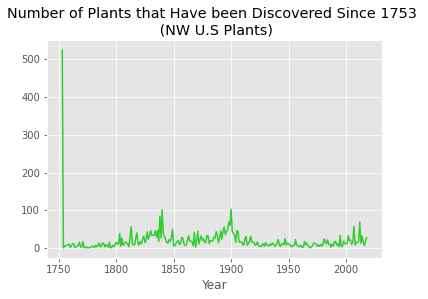

In [ ]:
nw_plants.groupby('year')['id'].count().plot(title='Number of Plants that Have been Discovered Since 1753 \n (NW U.S Plants)', xlabel="Year", color="limegreen")

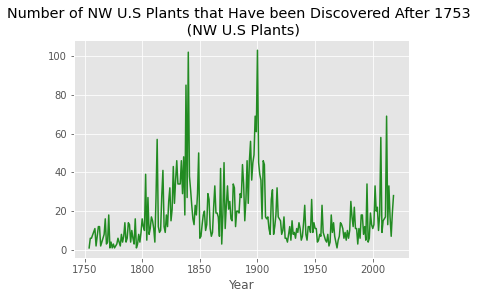

In [ ]:
no_1753 = nw_plants[nw_plants['year'] > 1753]
no_1753.groupby('year')['id'].count().plot(title='Number of NW U.S Plants that Have been Discovered After 1753 \n (NW U.S Plants)', xlabel="Year", color="forestgreen")

## Distribution of Introduced, Extinct, and Native Plants in California

In [ ]:
native_dist = pd.DataFrame(nw_plants['main_species.distribution.native'].str.contains('California').value_counts(normalize=True)).reset_index()
extinct_dist = pd.DataFrame(nw_plants['main_species.distribution.extinct'].str.contains('California').value_counts(normalize=True)).reset_index()
introduced_dist = pd.DataFrame(nw_plants['main_species.distribution.introduced'].str.contains('California').value_counts(normalize=True)).reset_index()

In [ ]:
native_dist['status'] = 'native'
native_dist['value'] = native_dist['main_species.distribution.native']

extinct_dist['status'] = 'extinct'
extinct_dist['value'] = extinct_dist['main_species.distribution.extinct']

introduced_dist['status'] = 'introduced'
introduced_dist['value'] = introduced_dist['main_species.distribution.introduced']

In [ ]:
cal_dist = pd.concat([native_dist, extinct_dist, introduced_dist])
cal_dist = cal_dist.reset_index()
cal_dist

,level_0,index,main_species.distribution.native,status,value,main_species.distribution.extinct,main_species.distribution.introduced
0,0,False,0.593969,native,0.593969,NaN,NaN
1,1,True,0.406031,native,0.406031,NaN,NaN
2,0,False,NaN,extinct,0.922414,0.922414,NaN
3,1,True,NaN,extinct,0.077586,0.077586,NaN
4,0,False,NaN,introduced,0.622120,NaN,0.62212
5,1,True,NaN,introduced,0.377880,NaN,0.37788


In [ ]:
alt.Chart(cal_dist).mark_bar().encode(
    x = 'status',
    y = 'value',
    color = 'index'
).properties(
    width=300,
    height=300
).properties(
    title='Distribution of Extinct, Introduced, and Native Northwest Plants in California'
)


alt.Chart(...)

## Distribution of Bloom Months

In [ ]:
nw_bloom = nw_plants[['id','main_species.growth.bloom_months']].dropna().reset_index()

In [ ]:
nw_bloom.describe()

,index,id
count,258.000000,258.000000
mean,589.100775,147061.232558
std,554.723738,33787.525442
min,5.000000,95651.000000
25%,269.750000,124856.250000
50%,481.500000,143086.000000
75%,710.500000,167183.500000
max,5259.000000,399927.000000


In [ ]:
bloom_months = {}
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

for month in months:
  temp = nw_bloom['main_species.growth.bloom_months'].str.contains(month).sum()
  bloom_months[month] = temp

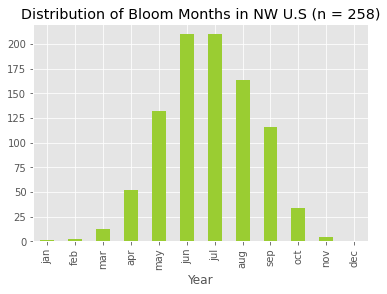

In [ ]:
pd.Series(bloom_months).plot.bar(title='Distribution of Bloom Months in NW U.S (n = 258)', xlabel='Year', color="yellowgreen")

## Top 10 Most Common Plant Families

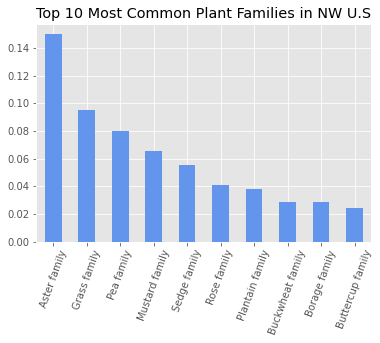

In [ ]:
nw_plants['main_species.family_common_name'].value_counts(normalize=True)[0:10].plot.bar(title="Top 10 Most Common Plant Families in NW U.S", 
                                                                           color="cornflowerblue", rot=70)

## Average Minimum and Maximum Precipitation for the Top 5 Plant Families

In [ ]:
top_5_fams = nw_plants[(nw_plants['main_species.family_common_name'] == 'Aster family') | 
          (nw_plants['main_species.family_common_name'] == 'Grass family') |
          (nw_plants['main_species.family_common_name'] == 'Pea family') |
          (nw_plants['main_species.family_common_name'] == 'Mustard family') |
          (nw_plants['main_species.family_common_name'] == 'Sedge family') 
          ]

In [ ]:
top_5_fams['main_species.family_common_name'].value_counts()

Aster family      747
Grass family      473
Pea family        397
Mustard family    326
Sedge family      276
Name: main_species.family_common_name, dtype: int64

In [ ]:
top_5_fams = top_5_fams.rename(columns={'main_species.growth.minimum_precipitation.mm': "Minimum Precipitation", 
                           'main_species.growth.maximum_precipitation.mm': "Maximum Precipitation"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Mean Minimum/Maximum Precipitation (mm) \n for Top 5 Plant Families in NW U.S')

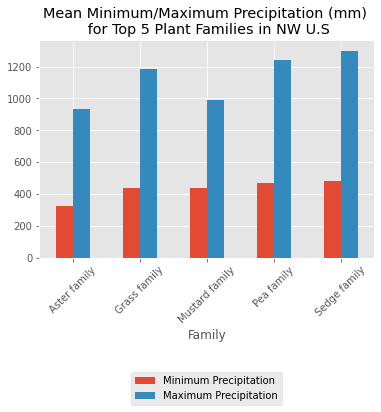

In [ ]:
top_5_fams.groupby('main_species.family_common_name')['Minimum Precipitation',
                                                      'Maximum Precipitation' ].mean().plot.bar(
                                                          xlabel ="Family", 
                                                          rot = 45
                                                      ).legend(loc='lower center', bbox_to_anchor=(0.5, -0.7));
plt.title("Mean Minimum/Maximum Precipitation (mm) \n for Top 5 Plant Families in NW U.S")

In [ ]:
top_5_fams.groupby('main_species.family_common_name')['Minimum Precipitation',
                                                      'Maximum Precipitation' ].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Minimum Precipitation,Maximum Precipitation
main_species.family_common_name,,
Aster family,321.730769,933.067308
Grass family,437.516129,1188.283871
Mustard family,435.473684,990.368421
Pea family,468.867647,1243.014706
Sedge family,478.492754,1301.565217


Text(0.5, 1.0, 'Density Distribution of Maximum Precipitation for \n Top 5 Plant Families in NW U.S')

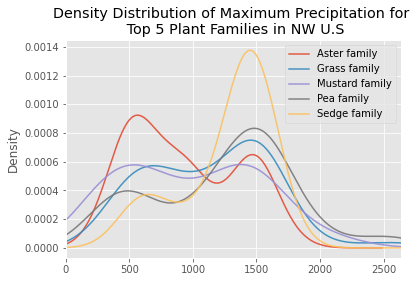

In [ ]:
top_5_fams.groupby('main_species.family_common_name')['Maximum Precipitation'].plot.density(alpha=0.9, legend=True, xlim=0)
plt.title("Density Distribution of Maximum Precipitation for \n Top 5 Plant Families in NW U.S")

## Conditional Probability of Foliage Texture Given Foliage Color

In [ ]:
df_text_color = nw_plants[['id', 'main_species.foliage.texture', 'main_species.foliage.color']].dropna().reset_index()

In [ ]:
len(df_text_color)

254

In [ ]:
df_text_color['main_species.foliage.color'].value_counts()

['green']     235
['yellow']      9
['grey']        7
['red']         3
Name: main_species.foliage.color, dtype: int64

In [ ]:
df_text_color['color'] = df_text_color['main_species.foliage.color'].str.lstrip("['").str.rstrip("']")

In [ ]:
color_list = ['lightpink', 'yellowgreen', 'lightseagreen']

Text(0.5, 1.0, 'Probability of Foliage Texture Given Foliage Color \n (n=254)')

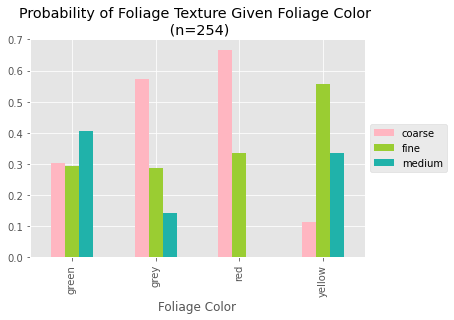

In [ ]:
cond_text_color = pd.crosstab(df_text_color['main_species.foliage.texture'], df_text_color['color'], normalize='columns')
cond_text_color.T.plot.bar(title='Probability of Foliage Texture given Foliage Color (n=254)', color=color_list,
                           xlabel="Foliage Color").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

plt.title("Probability of Foliage Texture Given Foliage Color \n (n=254)", loc="center")

In [ ]:
cond_text_color

color,green,grey,red,yellow
main_species.foliage.texture,,,,
coarse,0.302128,0.571429,0.666667,0.111111
fine,0.293617,0.285714,0.333333,0.555556
medium,0.404255,0.142857,0.000000,0.333333
